## Importing necessary libraries & dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading Books.csv data into a DataFrame
df_book = pd.read_csv('/Users/jayitachatterjee/Desktop/ML_Projects/Book_Recommendation_System/Dataset/Books.csv')

# Loading Ratings.csv data into a DataFrame
df_rating = pd.read_csv('/Users/jayitachatterjee/Desktop/ML_Projects/Book_Recommendation_System/Dataset/Ratings.csv')

# Loading Users.csv data into a DataFrame
df_user = pd.read_csv('/Users/jayitachatterjee/Desktop/ML_Projects/Book_Recommendation_System/Dataset/Users.csv')

In [4]:
# Display the first 5 rows of the Books.csv data to get an overview of the dataset
df_book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
# Display the first 5 rows of the Ratings.csv data to get an overview of the dataset
df_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
# Display the first 5 rows of the Users.csv data to get an overview of the dataset
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#Data Exploration

##Check all the columns


In [7]:
df_book.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

#### Data Information :
ISBN: A unique identifier for the book.

Book-Title: The title of the book.

Book-Author: The author of the book.

Year-Of-Publication: The year in which the book was published.

Publisher: The publisher of the book.

Image-URL-S: A URL pointing to a small image of the book cover.

Image-URL-M: A URL pointing to a medium-sized image of the book cover.

Image-URL-L: A URL pointing to a large image of the book cover.

In [8]:
df_rating.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

#### Data Information :
User-ID: A unique identifier for the user who provided the rating.

ISBN: A unique identifier for the book that was rated.

Book-Rating: The rating given to the book by the user.

In [9]:
df_user.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

#### Data Information :
User-ID: A unique identifier for the user.

Location: The location of the user, likely given as a string with details like city, state, and/or country.

Age: The age of the user.

##Check shape of the imported datasets


In [10]:
print(f"The Books dataset has {df_book.shape[0]} data points and {df_book.shape[1]} features.")


The Books dataset has 271360 data points and 8 features.


In [11]:
print(f"The Ratings dataset has {df_rating.shape[0]} data points and {df_rating.shape[1]} features.")

The Ratings dataset has 1149780 data points and 3 features.


In [12]:
print(f"The Users dataset has {df_user.shape[0]} data points and {df_user.shape[1]} features.")

The Users dataset has 278858 data points and 3 features.


## Rename the columns for better understanding

In [13]:
# Assuming your dataframe is named 'df'

df_book.rename(columns={
    'Book-Title': 'Book_Title',
    'Book-Author': 'Author',
    'Year-Of-Publication': 'Publication_Year',
    'Publisher': 'Publisher',
    'Image-URL-S': 'Image_URL_Small',
    'Image-URL-M': 'Image_URL_Medium',
    'Image-URL-L': 'Image_URL_Large'
}, inplace=True)
df_book.head()

,ISBN,Book_Title,Author,Publication_Year,Publisher,Image_URL_Small,Image_URL_Medium,Image_URL_Large
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [14]:
df_rating.rename(columns={
    'User-ID': 'User_ID',
    'Book-Rating': 'Book_Rating',
}, inplace=True)
df_rating.head()

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [15]:
df_user.rename(columns={
    'User-ID': 'User_ID'
}, inplace=True)
df_user.head()

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


##Check for missing values

In [16]:
df_book.isnull().sum()

ISBN                0
Book_Title          0
Author              2
Publication_Year    0
Publisher           2
Image_URL_Small     0
Image_URL_Medium    0
Image_URL_Large     3
dtype: int64

#### Insights :
It contains some missing values, with 2 missing entries in the Author and Publisher columns, and 3 missing entries in the Image_URL_Large column, but no missing values in other columns.

In [17]:
df_rating.isnull().sum()

User_ID        0
ISBN           0
Book_Rating    0
dtype: int64

#### Insights :
No missing values are present

In [18]:
df_user.isnull().sum()

User_ID          0
Location         0
Age         110762
dtype: int64

#### Insights :
There are 110,762 missing values in the Age column, while User_ID and Location have no missing entries.

## To check duplicate records

In [19]:
df_book.duplicated().sum()

np.int64(0)

In [20]:
df_rating.duplicated().sum()

np.int64(0)

In [21]:
df_user.duplicated().sum()

np.int64(0)

#### Insights :
There are no duplicated entries in any of the datasets.






## Merge df_book and df_ratng

In [22]:
df_book_rating = df_book.merge(df_rating, on = 'ISBN')
df_book_rating.columns

Index(['ISBN', 'Book_Title', 'Author', 'Publication_Year', 'Publisher',
       'Image_URL_Small', 'Image_URL_Medium', 'Image_URL_Large', 'User_ID',
       'Book_Rating'],
      dtype='object')

###Collaborative Filtering Based Recommender System

In [23]:
# Lets store users who had at least rated more than 200 books
x = df_book_rating['User_ID'].value_counts() > 200
x.shape

(92106,)

In [24]:
#y stores the index of users who have rated more than 200 books
y= x[x].index

In [25]:
# Filter the original DataFrame to include only ratings from users in y
filtered_rating = df_book_rating[df_book_rating['User_ID'].isin(y)]

In [26]:
# Group the filtered ratings by Book_Title and count the ratings per book
# Then, store books with at least 50 ratings in famous_books
y = filtered_rating.groupby('Book_Title').count()['Book_Rating']>=50
famous_books = y[y].index

In [27]:
#Filter the 'filtered_rating' DataFrame to include only books in 'famous_books'
final_ratings = filtered_rating[filtered_rating['Book_Title'].isin(famous_books)]
final_ratings.shape

(58586, 10)

In [28]:
final_ratings.head()

,ISBN,Book_Title,Author,Publication_Year,Publisher,Image_URL_Small,Image_URL_Medium,Image_URL_Large,User_ID,Book_Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,0
39,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113519,0


In [29]:
df_book_rating.head()

,ISBN,Book_Title,Author,Publication_Year,Publisher,Image_URL_Small,Image_URL_Medium,Image_URL_Large,User_ID,Book_Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [30]:
df_book_rating.shape

(1031136, 10)

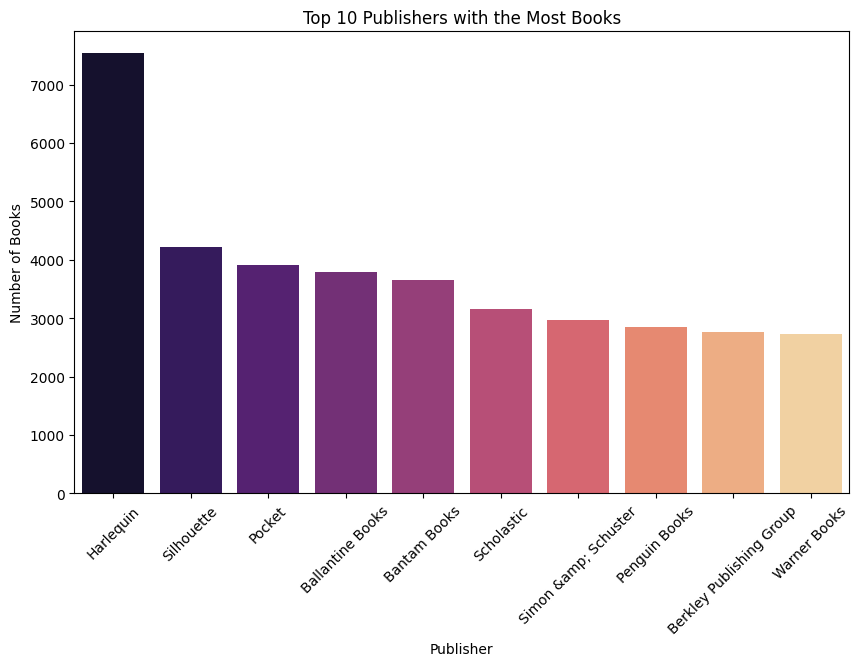

In [31]:
top_publishers = df_book['Publisher'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(top_publishers,palette='magma')
plt.title('Top 10 Publishers with the Most Books')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

#### Insights:
Harlequin dominates the top 10 publishers with over 7,000 books, far exceeding others like Silhouette and Pocket, which each have around 3,000 to 4,000 books. The remaining publishers have a more evenly distributed book count, indicating Harlequin's strong lead in the market.

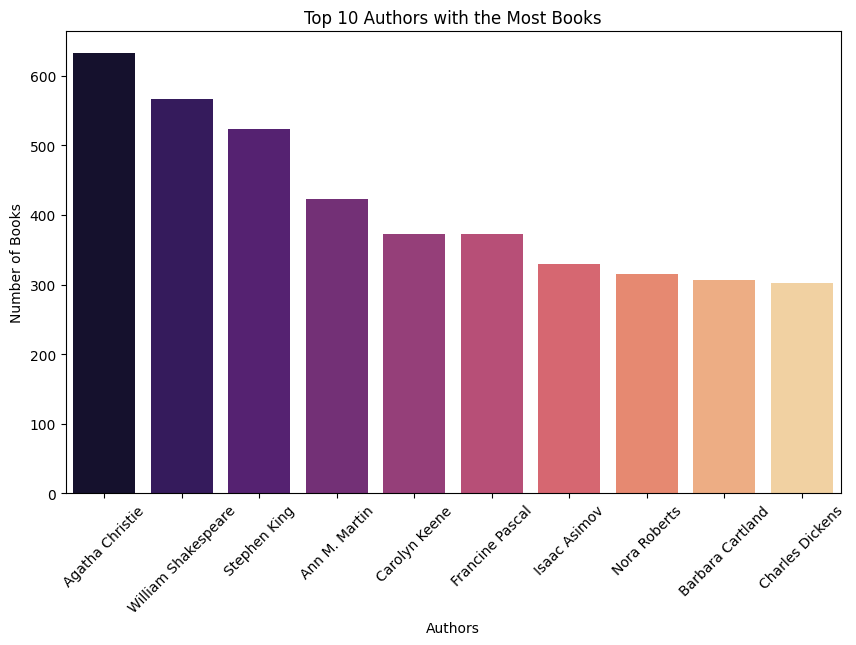

In [32]:
top_authors = df_book['Author'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(top_authors,palette='magma')
plt.title('Top 10 Authors with the Most Books')
plt.xlabel('Authors')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

#### Insights :
Agatha Christie is the most prolific author with over 600 books, followed by William Shakespeare and Stephen King, who each have around 500 books. The other top 10 authors have between 400 to 500 books, showing Christie's clear lead.

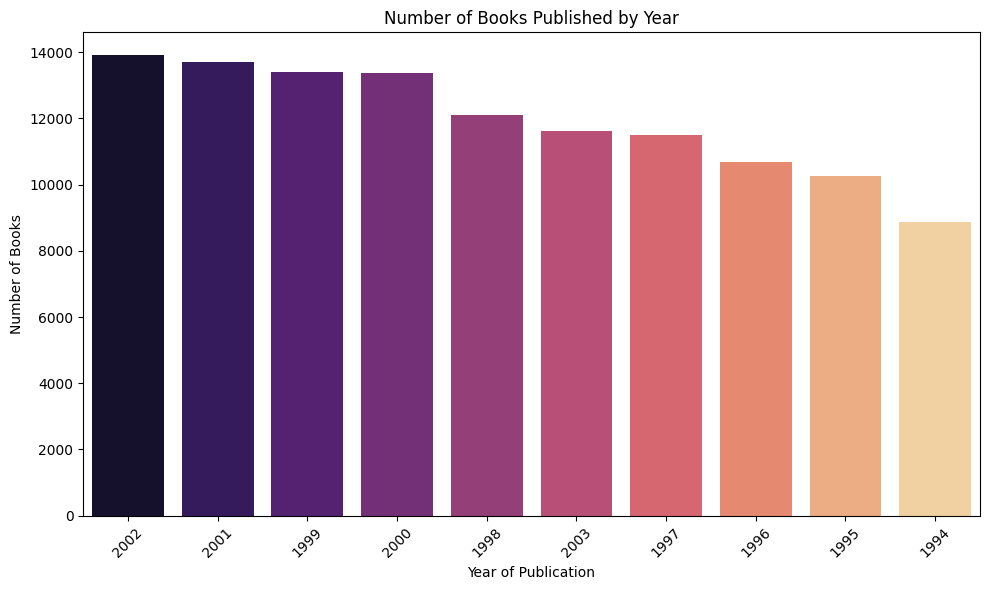

In [33]:
# Group the data by 'Year-Of-Publication' and count the number of books in each year
year_counts = df_book.groupby('Publication_Year').size().sort_values(ascending=False)

# Top 10 years with the most books published
top_10_years = year_counts.head(10)

# Convert years to integers
top_10_years.index = top_10_years.index.astype(int)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_years.index, y=top_10_years.values, order=top_10_years.index, palette='magma')
plt.title('Number of Books Published by Year')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


#### Insights :
The bar chart shows that the year 2002 had the highest number of books published, followed closely by 2001 and 1999. The number of published books slightly decreases in subsequent years, with 1994 having the lowest count among the top 10 years. This trend indicates a peak in book publishing around the early 2000s.

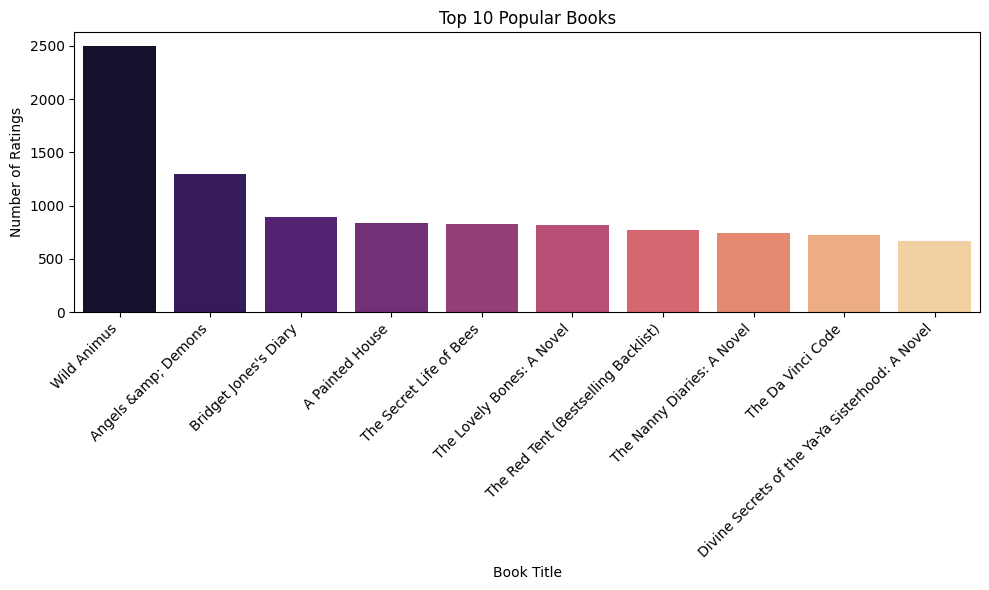

In [34]:
# Calculate the count of ratings for each book
book_ratings_count = df_book_rating.groupby('Book_Title').size().sort_values(ascending=False).head(10)

# Get the top 10 popular books based on ratings count
top_10_popular_books = df_book_rating[df_book_rating['Book_Title'].isin(book_ratings_count.index)]

# Create a bar chart to visualize the top 10 popular books
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_popular_books['Book_Title'].unique(), y=book_ratings_count, palette='magma')
plt.title('Top 10 Popular Books')
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Insights :
The bar chart shows the top 10 most popular books based on the number of ratings. "Wild Animus" is by far the most popular, with over 2,500 ratings, significantly surpassing the other books. "Angels & Demons" follows with around 1,000 ratings, while the remaining books, such as "Bridget Jones's Diary" and "The Da Vinci Code," have between 600 to 800 ratings. This indicates that "Wild Animus" has a much broader readership engagement compared to the other top titles.

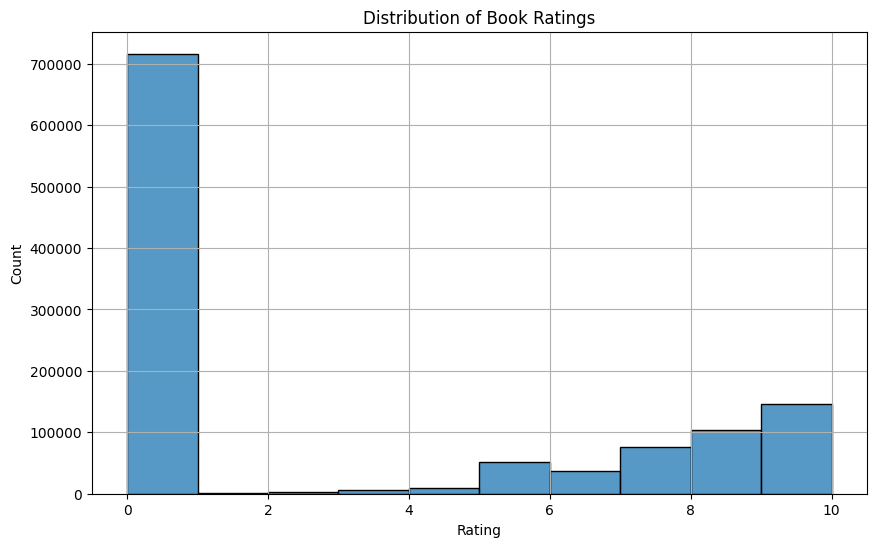

In [35]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_rating['Book_Rating'], bins=10, kde=False, palette='magma')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#### Insights :
The histogram shows that the majority of book ratings are at the extremes, with a large concentration at 0 and a significant number at 10, indicating polarized user opinions. Most other ratings are much less frequent.

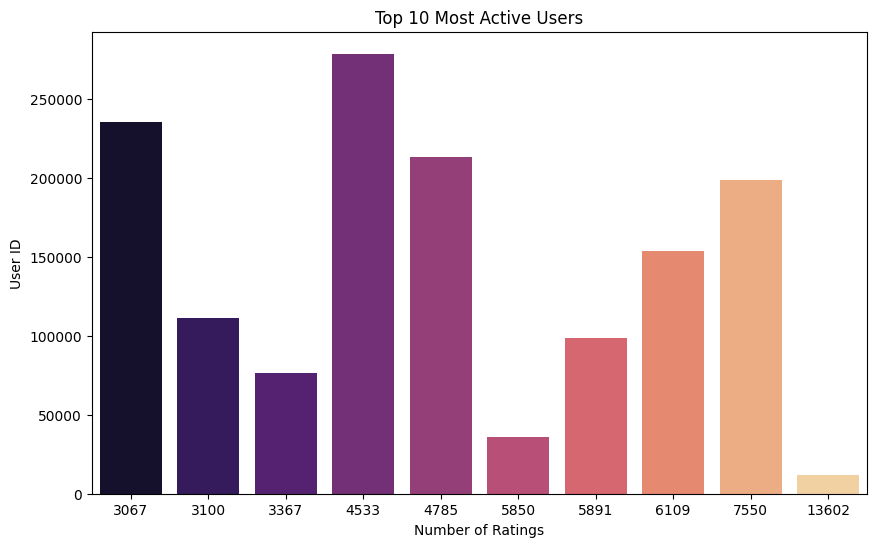

In [36]:
# Active Users
most_active_users = df_rating['User_ID'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=most_active_users.values, y=most_active_users.index, palette='magma')
plt.title('Top 10 Most Active Users')
plt.xlabel('Number of Ratings')
plt.ylabel('User ID')
plt.show()

#### Insights :
The bar chart shows that one user is overwhelmingly the most active, with over 250,000 ratings, while the other top 10 users have significantly fewer ratings, ranging from around 136,000 to 50,000. This indicates a highly skewed distribution of activity among the most active users.

In [37]:
# Extract the country from the 'Location' column, assuming it's the last part after a comma
df_user['Country'] = df_user['Location'].apply(lambda x: x.split(',')[-1].strip().lower() if pd.notnull(x) else 'unknown')

# Display the first few entries of the 'Country' column to verify the extraction
df_user['Country'].head()

# Count the occurrences of each country in the 'Country' column
country_counts = df_user['Country'].value_counts()


<Axes: xlabel='Country'>

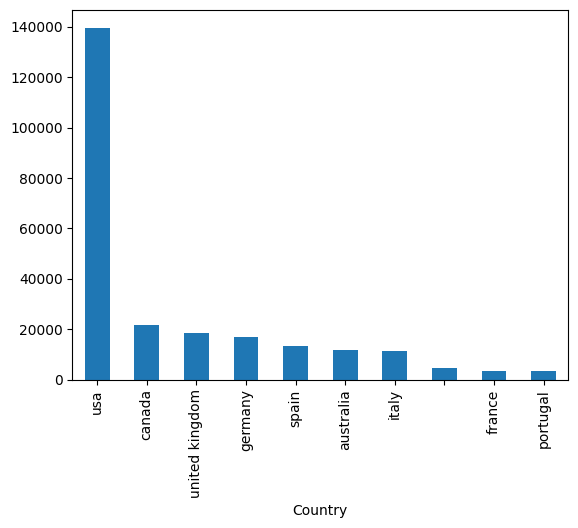

In [38]:
# top 10 user location
df_user['Country'].value_counts().head(10).plot(kind='bar')

#### Insights :
The bar chart shows that the user base is overwhelmingly dominated by the USA, with more than 140,000 users. Canada, the United Kingdom, and Germany follow, but with significantly smaller user bases. This indicates that the majority of users are concentrated in the USA, with other countries contributing a much smaller portion of the overall user population.

In [40]:
# Logarithmic scale transformation for better visualization
country_counts_log = np.log1p(country_counts)  # log(1 + x) to handle zeros

# Create the choropleth map
fig = px.choropleth(
    locations=country_counts.index,
    locationmode='country names',  # Match the country names in your data
    color=country_counts_log,  # Use the logarithmic scale
    color_continuous_scale='Viridis',
    range_color=(country_counts_log.min(), country_counts_log.max()),  # Adjust range for log scale
    template='plotly_white',
    title='Distribution of users by countries (Logarithmic Scale)'
)

# Customize the layout
fig.update_layout(
    font=dict(size=17, family="Franklin Gothic"),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

# Show the plot
fig.show()


#### Insights :
The choropleth map shows a global distribution of users, with higher concentrations of users in North America, Europe, and parts of Asia, as indicated by the logarithmic color scale. This suggests that the user base is predominantly located in these regions.

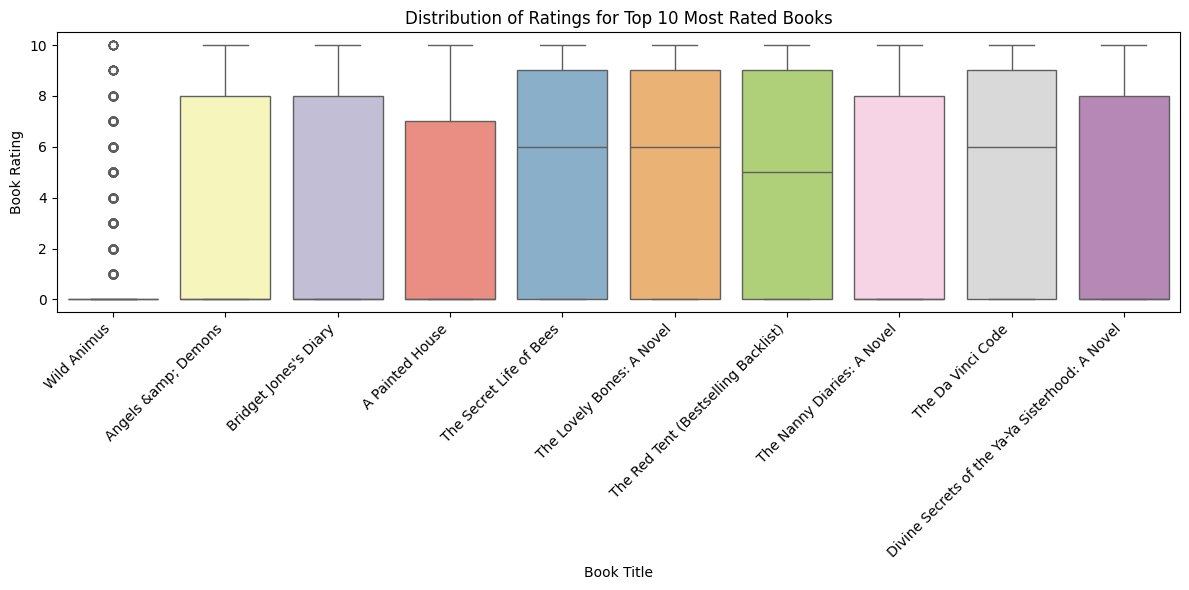

In [41]:


top_10_books = df_book_rating.groupby('Book_Title').size().sort_values(ascending=False).head(10)

# Step 2: Filter the dataframe to include only the top 10 books
top_10_books_data = df_book_rating[df_book_rating['Book_Title'].isin(top_10_books.index)]

# Step 3: Calculate the average rating for these top 10 books
average_ratings_top_10 = top_10_books_data.groupby('Book_Title')['Book_Rating'].mean()


# Step 4: Create a box plot to visualize the distribution of ratings for the top 10 books
plt.figure(figsize=(12, 6))
sns.boxplot(x='Book_Title', y='Book_Rating', data=top_10_books_data, palette='Set3')
plt.title('Distribution of Ratings for Top 10 Most Rated Books')
plt.xlabel('Book Title')
plt.ylabel('Book Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Insights :
The box plot shows that the ratings for the top 10 most rated books vary widely, with most books having a median rating around 7 to 8. "Wild Animus" has a wider distribution of ratings, including many low ratings, while other books like "Angels & Demons" and "The Da Vinci Code" have more concentrated and higher ratings. This suggests that while these popular books generally receive good ratings, some, like "Wild Animus," are more polarizing among readers.

In [42]:
# Pivot the DataFrame to create a user-item matrix
# Rows are 'Book_Title', columns are 'User_ID', and the values are 'Book_Rating'
user_item_matrix = final_ratings.pivot_table(columns='User_ID', index='Book_Title', values= 'Book_Rating')

user_item_matrix

User_ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book_Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [43]:
#Handle Missing Values (fill with 0)
user_item_matrix_filled = user_item_matrix.fillna(0)

user_item_matrix_filled

User_ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book_Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Model Training

In [45]:
# Convert the filled user-item matrix to a sparse matrix format
# This is efficient for storage and computation, especially with large matrices that contain many zeroes
book_sparse = csr_matrix(user_item_matrix_filled)

In [46]:
# Initialize the Nearest Neighbors model using the 'brute' algorithm and 'cosine' similarity as the metric
# This unsupervised machine learning algorithm finds the nearest neighbors based on the cosine similarity
model = NearestNeighbors(algorithm= 'brute',metric='cosine')
model.fit(book_sparse)


NearestNeighbors(algorithm='brute', metric='cosine')

In [47]:
#Finding Similar Books using Nearest Neighbors
distance, suggestion = model.kneighbors(user_item_matrix_filled.iloc[237, :].values.reshape(1, -1), n_neighbors=6)
# Display the distances and suggestions
print("Distances:", distance)
print("Suggestions (Indices):", suggestion)

Distances: [[0.         0.67948966 0.70002088 0.71630418 0.71828125 0.72770943]]
Suggestions (Indices): [[237 145 303 137  95  58]]


In [48]:
#Show the titles corresponding to the suggestions
print("Suggested Books for User at Index 241:")
print(user_item_matrix_filled.index[suggestion[0]])

Suggested Books for User at Index 241:
Index(['Hearts In Atlantis', 'Desperation', 'Lightning',
       'Dark Rivers of the Heart', 'Carrie', 'Bag of Bones'],
      dtype='object', name='Book_Title')


In [49]:
#Keeping a List of Book Titles
book_names = user_item_matrix_filled.index

In [50]:
#Find the index of a specific book
book_idx = np.where(user_item_matrix_filled.index == '4 Blondes')[0][0]
print(f"Index of '4 Blondes': {book_idx}")

Index of '4 Blondes': 3


In [51]:
#Find the URL of a Specific Book
# Assume final_ratings dataframe has a 'Book_Title' and 'Image_URL_Large' columns
book_title = "Harry Potter and the Chamber of Secrets (Book 2)"
ids = np.where(final_ratings['Book_Title'] == book_title)[0][0]
image_url = final_ratings.iloc[ids]['Image_URL_Large']
print(f"Image URL for '{book_title}': {image_url}")


Image URL for 'Harry Potter and the Chamber of Secrets (Book 2)': http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg


In [52]:
#Get URLs of Suggested Books
book_name_list = []
for book_id in suggestion[0]:  # Assuming suggestion is an array of indices
    book_name_list.append(user_item_matrix_filled.index[book_id])

In [53]:
# Finding the image URLs for these book titles
ids_index = []
for name in book_name_list:
    ids = np.where(final_ratings['Book_Title'] == name)[0][0]
    ids_index.append(ids)

In [54]:
for idx in ids_index:
    url = final_ratings.iloc[idx]['Image_URL_Large']
    print(f"Image URL for '{final_ratings.iloc[idx]['Book_Title']}': {url}")

Image URL for 'Hearts In Atlantis': http://images.amazon.com/images/P/0671024248.01.LZZZZZZZ.jpg
Image URL for 'Desperation': http://images.amazon.com/images/P/0451188462.01.LZZZZZZZ.jpg
Image URL for 'Lightning': http://images.amazon.com/images/P/0425115801.01.LZZZZZZZ.jpg
Image URL for 'Dark Rivers of the Heart': http://images.amazon.com/images/P/034539657X.01.LZZZZZZZ.jpg
Image URL for 'Carrie': http://images.amazon.com/images/P/0451157443.01.LZZZZZZZ.jpg
Image URL for 'Bag of Bones': http://images.amazon.com/images/P/067102423X.01.LZZZZZZZ.jpg


In [55]:
#Defining a Function to Recommend Books
def recommend_book(book_name):
    book_id = np.where(user_item_matrix_filled.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(user_item_matrix_filled.iloc[book_id, :].values.reshape(1, -1), n_neighbors=6)

    print(f"You searched for '{book_name}'\n")
    print("The suggested books are:\n")
    for i in range(len(suggestion)):
        books = user_item_matrix_filled.index[suggestion[i]]
        for j in books:
            if j != book_name:  # To avoid recommending the same book
                print(j)

# Example: Recommend books similar to "Harry Potter and the Chamber of Secrets (Book 2)"
book_name = "Harry Potter and the Chamber of Secrets (Book 2)"
recommend_book(book_name)


You searched for 'Harry Potter and the Chamber of Secrets (Book 2)'

The suggested books are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)


#Saving Model and Data Artifacts

In [56]:
import os
import pickle

# Ensure the 'artifacts' directory exists
os.makedirs('artifacts', exist_ok=True)

# Save the model and other objects
pickle.dump(model, open('artifacts/model.pkl', 'wb'))
pickle.dump(book_names, open('artifacts/book_names.pkl', 'wb'))
pickle.dump(final_ratings, open('artifacts/final_rating.pkl', 'wb'))
pickle.dump(user_item_matrix_filled, open('artifacts/book_pivot.pkl', 'wb'))
